In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_autos=pd.read_csv('autos.csv', sep=(';'))
df=pd.DataFrame(data_autos)
df
def cambio_pais(n):
    if n=='Japan':
        n=1
    elif n=='Europe':
        n=2
    elif n=='USA':
        n=3
    else:
        print("No existe")

    return n
df['Numero_Pais']=df['Pais_Origen'].apply(cambio_pais)

In [29]:
dis=[]
def desplazamiento(d):
    for i in df['Desplazamiento']:
        dis.append(i)
    return dis
desplazamiento(df['Desplazamiento'])

cab=[]
def caballo(c):
    for i in df['Caballo_De_Fuerza']:
        cab.append(i)
    return cab
caballo(df['Caballo_De_Fuerza'])

dic={'Var1':dis,
    'Var2':cab}

df_1=pd.DataFrame(dic)

In [30]:
df['Var_A']=np.log10(df_1['Var1']/df_1['Var2'])
df['Var_B']=np.sqrt(df_1['Var1'])*np.exp(df_1['Var2'])/200

In [31]:
def cualitativas(m):
    if df_1['Var1'][m] > df_1['Var2'][m]:
        a=5  
    else:
        a=3
    return a

indices=range(0,len(df_1['Var1']))

VarC=[]

for j in indices:  
    p=cualitativas(j)
    VarC.append(p)
df['Var_C']=VarC

In [25]:
df['Var_D']=1/np.log(df_1['Var1']/df_1['Var2'])*100
df['Var_E']=df_1['Var2']**2/df_1['Var1']
df

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Numero_Pais,Var_A,Var_B,Var_C,Var_D,Var_E
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/1/1970,130.0,3,0.373195,2.516644e+55,5,116.371992,55.048860
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/1/1970,165.0,3,0.326584,4.261805e+70,5,132.980902,77.785714
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/1/1970,150.0,3,0.326336,1.242670e+64,5,133.082059,70.754717
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/1/1970,150.0,3,0.306782,1.215008e+64,5,141.564376,74.013158
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/1/1970,140.0,3,0.333879,5.497952e+59,5,130.075447,64.900662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/1/1982,86.0,3,0.211630,1.322390e+36,5,205.214447,52.828571
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/1/1982,52.0,2,0.270768,1.886553e+21,5,160.393346,27.876289
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/1/1982,84.0,3,0.206054,1.757411e+35,5,210.766821,52.266667
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/1/1982,79.0,3,0.181554,1.116413e+33,5,239.209333,52.008333


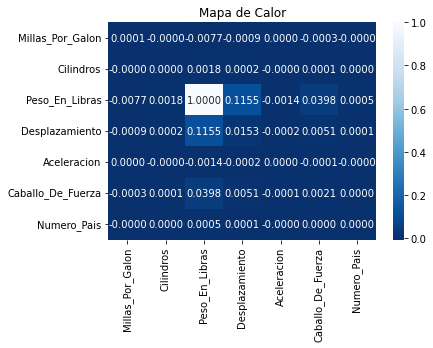

In [66]:
#Utilizamos la data completa donde se incluye las variables numericas creadas que son Numero_pais, Var_A, Var_B, Var_C,
#Var_D, Var_E. (DATOS='df')

#Utilizamos la covariancia entre las variables de la base de datos('cov')
df_1=df.cov()
    
#Creamos la funcion correlacion, que tiene como entrada única los valores de la data a utilizar.
def correlacion(datos):
    
#Determinamos el mayor valor de la covariancia para poder normalizar los valores
#de la base de datos.
    valor_normal=datos['Peso_En_Libras'].max()
    df_normal=df_1/valor_normal

#Utilizamos la libreria seaborn, para realizar el mapa de calor.
    sns.heatmap(df_normal, annot=True ,fmt='.4f',cmap='Blues_r').set_title('Mapa de Calor')
    plt.show()
#Llamamos a la funcion correlacion, utilizando la base de datos.
correlacion(df_1)